In [1]:
from rdkit import Chem
from rdkit.Chem import Draw
from IPython.display import SVG
from rdkit.Chem.Draw import rdMolDraw2D
from IPython.display import Image
import pandas as pd

In [2]:
drug_att = pd.read_csv('drug_attention_weights.csv')

In [3]:
drug_att['scale'] = drug_att['weights'].apply(lambda x:((x-drug_att['weights'].min())/(drug_att['weights'].max()-drug_att['weights'].min())))

In [4]:
def mol_with_atom_index(mol):
    """atom index"""
    atoms = mol.GetNumAtoms()
    for idx in range( atoms ):
        mol.GetAtomWithIdx( idx ).SetProp( 'molAtomMapNumber', str( mol.GetAtomWithIdx( idx ).GetIdx() ) )
    return mol

In [5]:
mol = Chem.MolFromSmiles('CC1=CC=C(C=C1)N1N=C(C=C1NC(=O)NC1=CC=C(OCCN2CCOCC2)C2=C1C=CC=C2)C(C)(C)C')

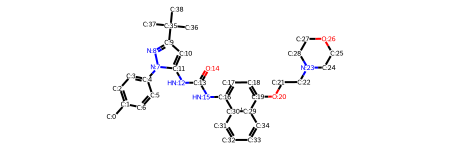

In [6]:
mol_with_atom_index(mol)

In [7]:
indexs = drug_att[drug_att['scale']>0.85].index.tolist()
atom_cols = {}
atom_rs = {}

for i in range(len(indexs)):
    if indexs[i] != 14:
        atom_cols[indexs[i]] = (176/256,224/256,230/256)
    else:
        atom_cols[indexs[i]] = (255/256,127/256,80/256)
    atom_rs[indexs[i]] = 0.45

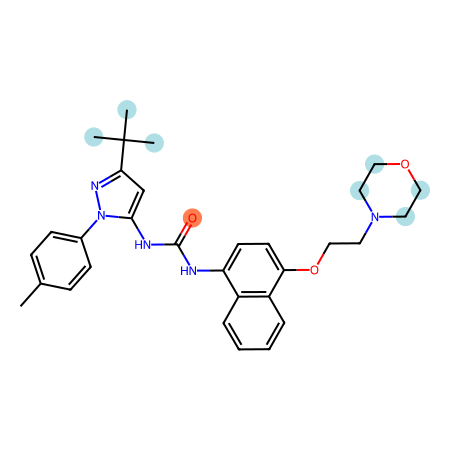

In [8]:
mol = Chem.MolFromSmiles('CC1=CC=C(C=C1)N1N=C(C=C1NC(=O)NC1=CC=C(OCCN2CCOCC2)C2=C1C=CC=C2)C(C)(C)C')
d = rdMolDraw2D.MolDraw2DSVG(450, 450)
rdMolDraw2D.PrepareAndDrawMolecule(d, mol,highlightAtoms=indexs, highlightAtomRadii=atom_rs,highlightAtomColors=atom_cols)
d.FinishDrawing()

SVG(d.GetDrawingText())

# save svg
svg = d.GetDrawingText()
with open('highlight_atoms.svg', 'w') as f:
    f.write(svg)